<a href="https://colab.research.google.com/github/gustavo-duarte-silva/CO2-Emission/blob/main/PyProjectData_1_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto Realizado no Google Colab

In [1]:
# Importando as bibliotecas basicas para analise de dados
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Abrindo um Arquivo .csv e transformando em um dataframe do pandas 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FuelConsumptionCo2.csv")

In [3]:
# Mostra as 10 primeira informações do dataframe
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
# Mostra a descrição do dataframe
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# Verifica se existe Valores faltantes no dataframe 
df.isnull().values.any()

False

## **Informações Obtidas:**

*   #### Não Possui Dados Faltantes
*   #### Os Dados possui Outlier



In [6]:
df.corr()['CO2EMISSIONS'].sort_values(ascending=False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

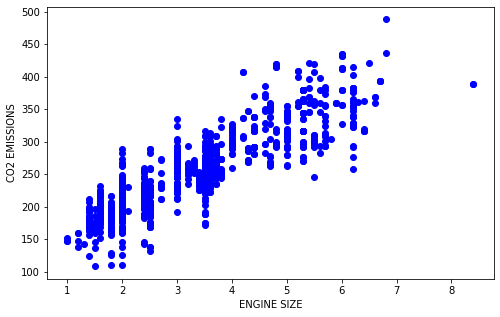

In [7]:
plt.figure(figsize=[8,5])
plt.scatter(df['ENGINESIZE'],df['CO2EMISSIONS'], color = 'blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

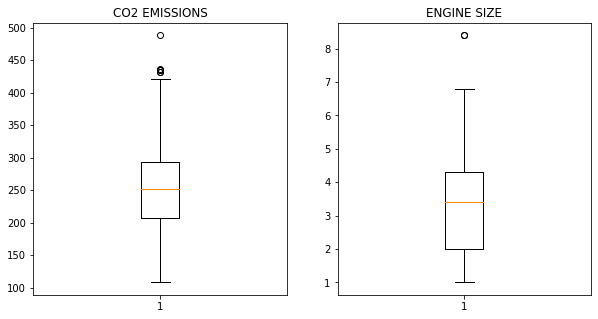

In [8]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title("CO2 EMISSIONS")
plt.boxplot(df.CO2EMISSIONS)
plt.subplot(1,2,2)
plt.title("ENGINE SIZE")
plt.boxplot(df.ENGINESIZE)
plt.show()

In [9]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [10]:
df['OUTLIER_ENGINESIZE'] = detecta_outlier(df.ENGINESIZE)
df['OUTLIER_C02'] = detecta_outlier(df.CO2EMISSIONS)

In [11]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,OUTLIER_ENGINESIZE,OUTLIER_C02
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,0
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,0
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,0


In [12]:
dff = df.loc[(df.OUTLIER_C02==0) & (df.OUTLIER_ENGINESIZE==0)]

In [13]:
#Importando a biblioteca de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
X = dff['ENGINESIZE'].values.reshape(-1,1)
y = dff['CO2EMISSIONS'].values.reshape(-1,1)

In [15]:
dx_treino, dx_teste, dy_treino, dy_teste = train_test_split(X,y,test_size = 0.2, random_state = 30)

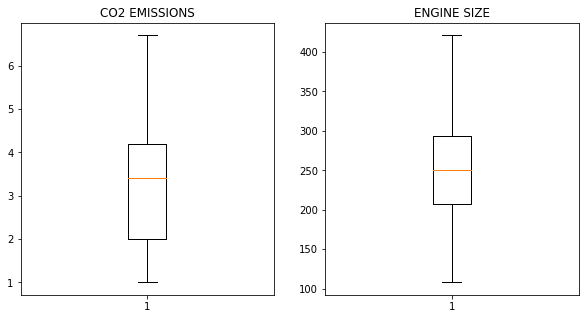

In [16]:
#Outliers Removido
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title("CO2 EMISSIONS")
plt.boxplot(dx_treino)
plt.subplot(1,2,2)
plt.title("ENGINE SIZE")
plt.boxplot(dy_treino)
plt.show()

In [17]:
modelo_lm = LinearRegression()

In [18]:
modelo_lm.fit(dx_treino,dy_treino)

LinearRegression()

In [19]:
ypred = modelo_lm.predict(dx_treino)

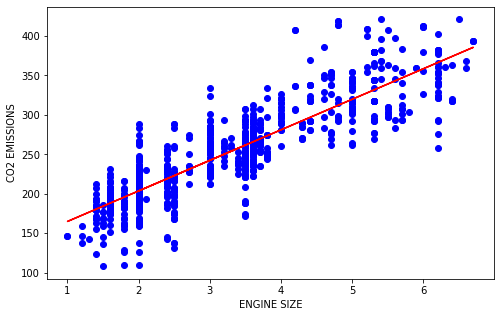

In [20]:
plt.figure(figsize=[8,5])
plt.scatter(dx_treino,dy_treino, color = 'blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")

plt.plot(dx_treino, ypred,color = 'red')
plt.show()

In [21]:
ypredCO2_final = modelo_lm.predict(dx_teste)

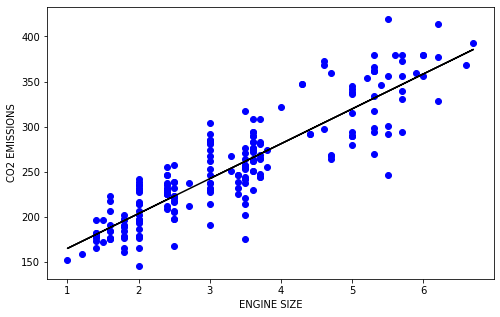

In [22]:
plt.figure(figsize=[8,5])
plt.scatter(dx_teste,dy_teste, color = 'blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")

plt.plot(dx_teste, ypredCO2_final,color = 'black')
plt.show()

In [23]:
r2_score(y_true = dy_teste ,y_pred = ypredCO2_final)

0.7927267005065441

In [24]:
#Prevendo para um motor com tamanho de 4.5
ENGSIZE = 4.5
print('Tamanho do Motor: {}'.format(ENGSIZE))
print('CO2 EMITIDO: {}'.format(modelo_lm.predict([[ENGSIZE]])))

Tamanho do Motor: 4.5
CO2 EMITIDO: [[300.45824608]]
